In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

# Loss Functions

**Regression Losses**

-MSE(Mean Squared Error), Quadratic Loss, L2 Loss

$$MSE =  \frac{\sum_{i=1}^n (y_i-\hat y_i)^2}{n}$$
-MAE(Mean Absolute Error), L1 Loss 

$$MAE =  \frac{\sum_{i=1}^n  \mid y_i-\hat y_i \mid}{n} $$
-MBE(Mean Bias Error) $$MBE =  \frac{\sum_{i=1}^n  ( y_i-\hat y_i )}{n} $$

**Classification Losses**

- Hinge Loss/SVM Loss
$$SVM =   \sum_{j \neq y_i} max(0,s_j-s_{y_i}+1)$$
- Cross Entropy Loss/Negative Log Likelihood
$$CrossEntropy =   -(\hat y_i log (\hat y_i) + (1-\hat y_i)log(1-\hat y_i ))$$

**Characteristics**

- MSE: good mathematical properties concerning gradients, penalizes outliers heavily
- MAE: needs more complicated tools for gradient calculation
- MBE: can determine bias of the model, includes the direction of error
- SVM: "score of correct categories should be greater than the score of incorrect", not differntiable but convex
- Cross Entropy: most used for classificiation problems, multiplying the log of the predicted probabilities, penalizes confident but wrong predictions the most

# Why do we use Relu and Leaky Relu
<div> <img src="img/RELU.png" width =50%></div>
- gradient calculation is simple (0 or 1)
- problem of standard Relu: Dead neurons -> neuron are largely negative and become stuck because of the gradient being 0(activation)
- leaky Relu does tackle this problem by giving an $\alpha$ value as slope in the sector $ x<0$ instead of just setting output values to $0$

# Problems with Optimization  

**Convexity**

Optimization in the context of neural networks is non-convex most of the time.
The goal of optimization is to arrive at the global minimum concerning our loss surface. With sufficiently large networks a local minimum can results in comparable error values (to global minimum) and can be accepted as likely. 

**Saddle points**

In higher dimensional problems saddle points are more likely than minima though they still possess the same characteristic of the gradient being $0$ (necessary condition). The diminishing gradient will result in negligible updatesteps and the training to cease. 

**Poor Condition**

Most problems occupy a error-function which derivatives are ill-conditioned. This is represented in the error surface containing many saddle points and flat regions. This can be verified by computing the Hessian Matrix (sufficient condition) of the stationary point which is computationally expensive and often approximated in algorithms like quasi-Newotn or BFGS. These Hessian matrix is often poorly conditioned resulting in an unstable learning process.

**Exploding and vanishing gradients**

Suppose we have a network with $n$ hidden layers without activation function where each layer can be represented as $$h_i = W x \quad i = 1 $$ $$h_i =W h_{i-1} \quad i = 2,3,...,n$$ then supposing we have two neurons in each layer and the weight matrix is represented by $$ W = \begin{bmatrix} a & 0\\ 0 & b \end{bmatrix} $$ then we can write the output of each layer as $$ \begin{bmatrix} h_1^i\\ h_2^i \end{bmatrix} = \begin{bmatrix} a^i & 0\\ 0 & b^i \end{bmatrix} \begin{bmatrix} h^{i-1}_1\\ h^{i-1}_2 \end{bmatrix} $$ Now suppose the input $x$ is $$\begin{bmatrix} x_1\\ x_2 \end{bmatrix} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$$ then we can show that for $a=1$ and $b=2$ where we denote the output of the network as $y$: $$\nabla y = \begin{bmatrix} n\\n*2^{n-1} \end{bmatrix} \quad\quad Exploding Gradient!$$ on the other hand supposing $a=0.5$ and $b=0.9$ we can show that $$\nabla y = \begin{bmatrix} 0\\0 \end{bmatrix} \quad\quad Vanishing Gradient!$$
This problem can partially solved by clipping the gradient at a certain threshold value. 

> Are exploding gradients restricted trough activation layers like sigmoid/tanh?



# Solving opimization problems

**Momentum**

The momentum is an added term in the update procedure of the parameters in the optimization step. 

We compute the gradients: 
$$ g =\frac{1}{m}\sum_i \nabla L_\theta (f(x^{(i)};\theta),y^{(i)} ) $$
And additionally a velocity term is defined:
$$ v = \alpha v -\varepsilon g$$ where $\alpha \in [0,1)$ denotes a hyperparameter determining how fast past gradient information is lost. $\varepsilon$ denotes the learning rate.
For updating the parameters $\theta$ follows
$$\theta = \theta + v$$
![momentum](img/momentum.png)
>Nesterov Momentum: lookahead gradient. Performing a correction step after calculating gradient from a step in velocity direction

**Adaptive learning rate**
- AdaGrad: 

learning rate is updated by a term inversly proportional to the cumulated squarred gradient. A problem is the diminishing learning rate through the accumulation of the always positive gradients.
            
$$\begin{aligned} r_{i+1} = r_i + g_i^2 | \text{accumulation of squarred gradients}\\ \theta_{i+1} =\theta_i - \frac{\varepsilon}{\sigma +\sqrt{r_{i+1}}}g_i \quad\quad| \text{updating parameters}\end{aligned}$$
- RMSProp:

Especially on non-convex problems the decreasing learning rate is a problem. For this the exponentially weighted average for gradient accumulation performs better.
$$r_{i+1}=\rho r_i + (1 - \rho)g_i^2$$
$$\theta_{i+1} = \theta_i - \frac{\varepsilon}{\sigma +\sqrt{r_{i+1}}}g_i $$
- Adam (adaptive moment estimation):

Combining the approaches of RMSProp and Momentum. Containing exponentially decaying average of past squarred and normal gradients. Robust to hyperparameters and works well in practice.

estimate first momentum:
$$v_{i+1}=\rho r_i + (1 - \rho)g_i$$
estimate second momentum:
$$r_{i+1}=\rho r_i + (1 - \rho)g_i^2$$
Updating:
$$\theta_{i+1} = \theta_i - \frac{\varepsilon}{\sigma +\sqrt{r_{i+1}}}g_{i+1} $$

>Batch Normalization, Parameter Initialization -> Topics to work on

# Bounding boxes with label

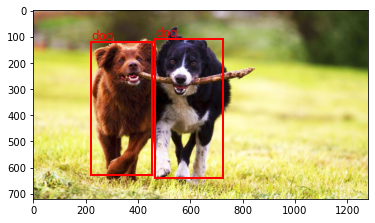

In [4]:
# example image used for bb creation
img = plt.imread("img/dogs.jpg")
#plt.imshow(img)
#bounding to coordinates in Form x1,y1,x2,y2,label
d1box,d2box = [221, 121, 454, 627, "dog"] , [466, 640, 725, 110, "dog"]
def draw_bbox(bbox,color = "red"):
    # converting the coordinates to plt parameters: upper-left x, upper-left y, width and height
    xmin = (bbox[0] if bbox[0] <= bbox[2] else bbox[2])
    ymin = (bbox[1] if bbox[1] <= bbox[3] else bbox[3])
    width = np.absolute(bbox[0]-bbox[2])
    height = np.absolute(bbox[1]-bbox[3])
    patch = plt.Rectangle((xmin,ymin),width,height, edgecolor=color, linewidth=2,fill=False)
    return patch

def add_label(bbox,figure,color ="red"):
    # converting the coordinates to plt parameters: upper-left x, upper-left y, width and height
    xmin = (bbox[0] if bbox[0] <= bbox[2] else bbox[2])
    ymin = (bbox[1] if bbox[1] <= bbox[3] else bbox[3])
    figure.axes.text(xmin,ymin-10,bbox[4],fontsize=12,color=color)

def add_bbox(bbox,figure,color="red"):
    figure.axes.add_patch(draw_bbox(bbox))
    add_label(bbox,figure)

fig = plt.imshow(img)
add_bbox(d1box,fig);
add_bbox(d2box,fig);


# Mathematics of Autoencoders
<div>
    <img src="img/autoencoder_architecture.png" width=80%>
</div>

Given the above structure of an autoencoder we define the autoencoder as a function $\Theta(g_\phi(\mathbf x), f_\theta(\mathbf z))$ where  $ g_\phi(\mathbf{x}) $ denotes the encoder mapping from the input space $X$ to the latent space $Z$ and $f_\theta(\mathbf{z})$ denotes the decoder mapping from the latent space $Z$ to the output space $X'$ with $x \in X$, $z \in Z$ and $x' \in X'$. $\phi$ and $\theta$ are the parameters of the encoder and decoder respectively.
The functions of encoder and decoder are:
$$ \mathbf{z} = g_\phi(\mathbf{x}) \quad\quad|Encoder$$
$$ \mathbf{x'} = f_\theta(\mathbf{z}) \quad\quad|Decoder$$
The autoencoderfunction is respectively:
$$ \Theta = f_\theta(g_\phi(x^{(i)}))$$
The training is called self-supervised. The given input $x$ not only provides the input but also the desired output of the autoencoder. Therer are various metrics capturing the difference between two vectors, here MSE.
$$L(\phi,\theta) = \frac{1}{n}\sum_{i=1}^{n}(x^{(i)} - f_\theta(g_\phi(x^{(i)})))^2$$
Both encoder and decoder can be implemented by neural networks as demonstrated below.

# Autoencoder in Keras
- the autoencoder will be trained on the mnist dataset of hand written digits due to it's easy access in the keras database
- first step is to flatten and normalize the input
- defining the model with the Sequential-Model provided (stack of layers!)
- defining encoder and decoder model respectivly, utilizing the pretrained layers from the autoencoder

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data() # greyscale images
base_ipt_dim =(x_train.shape[1],x_train.shape[2]) # 28 x 28
enc_dim = 28 #encoding vector dimensions
# normalization and flattening
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
x_train = x_train.reshape((len(x_train),x_train.shape[1]*x_train.shape[2]))
x_test = x_train.reshape((len(x_train),x_test.shape[1]*x_test.shape[2]))

# Defining the keras model for the autoencoder 
ae = keras.Sequential(layers=None,name="autoencoder")
ae.add(keras.layers.Input(shape=(784,))) #input layer
ae.add(keras.layers.Dense(enc_dim,activation="relu"))
ae.add(keras.layers.Dense(784,activation="softmax"))
ae.compile(optimizer="adam",loss="mse")
ae.fit(x_train,x_test,epochs=20,batch_size=128,shuffle=True)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.1104
Epoch 2/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1099
Epoch 3/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1098
Epoch 4/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1098
Epoch 5/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1098
Epoch 6/20
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1098
Epoch 7/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1098
Epoch 8/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1098
Epoch 9/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1097
Epoch 10/20
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1097
Epoch 11/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1097
Epoch 1

In [4]:
#defining models for encoder and decoder
enc = keras.Sequential()
enc.add(keras.layers.Input(shape=(784,))) #input layer
enc.add(ae.layers[0])

dec = keras.Sequential()
dec.add(keras.Input(shape=(enc_dim,)))
dec.add(ae.layers[1])

In [5]:
encoded_imgs = enc.predict(x_test)
decoded_imgs = dec.predict(encoded_imgs)

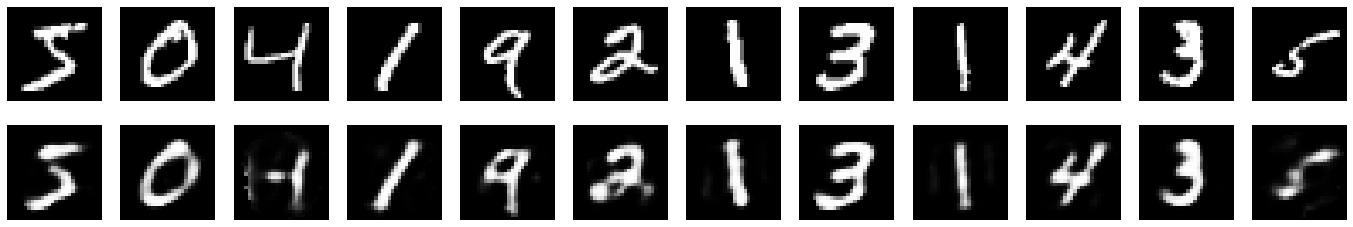

In [6]:
n = 12
plt.figure(figsize=(24, 4))
for i in range(n):
    # originals
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')

plt.show()

# Mathematics of Denoising Autoencoders
<div>
    <img src="img/denoising-autoencoder-architecture.png" width=80%<
</div>

The basic idea of denoising autoencoders is to avoid overfitting by partially corrupting the input with noise so that $\tilde{\mathbf{x}} \sim \mathcal{M}_\mathcal{D}(\tilde{\mathbf{x}} \vert \mathbf{x})$ and reconstructing the uncorrupted input $x$ from the corrupted input $\tilde x$. $\mathcal{M}_\mathcal{D}$ denotes the stochastic mapping from the true inputs $x$ to the corrupted inputs $\tilde x$. (i.e. masking noise, Gaussian noise, dropout) 
$$
\begin{aligned}
\tilde{\mathbf{x}}^{(i)} &\sim \mathcal{M}_\mathcal{D}(\tilde{\mathbf{x}}^{(i)} \vert \mathbf{x}^{(i)})\\
L_\text{D}(\theta, \phi) &= \frac{1}{n} \sum_{i=1}^n (\mathbf{x}^{(i)} - f_\theta(g_\phi(\tilde{\mathbf{x}}^{(i)})))^2
\end{aligned}
$$

In [7]:
# Code is identical to the code above except the noise introduction 
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data() # greyscale images
# defining gaussian noise
mean = 0
var = 5
sigma = var**0.5
noise = np.random.normal(mean,sigma,(len(x_train),28,28))
x_train = x_train + noise

base_ipt_dim =(x_train.shape[1],x_train.shape[2]) # 28 x 28
enc_dim = 28 #encoding vector dimensions
# normalization and flattening
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
x_train = x_train.reshape((len(x_train),x_train.shape[1]*x_train.shape[2]))
x_test = x_train.reshape((len(x_train),x_test.shape[1]*x_test.shape[2]))
# adding noise to image
noise = np.random.normal(784,)
# Defining the keras model for the autoencoder 
ae = keras.Sequential(layers=None,name="autoencoder")
ae.add(keras.layers.Input(shape=(784,))) #input layer
ae.add(keras.layers.Dense(enc_dim,activation="relu"))
ae.add(keras.layers.Dense(784,activation="sigmoid"))
ae.compile(optimizer="adam",loss="mse")
ae.fit(x_train,x_test,epochs=20,batch_size=128,shuffle=True)

#defining models for encoder and decoder
enc = keras.Sequential()
enc.add(keras.layers.Input(shape=(784,))) #input layer
enc.add(ae.layers[0])

dec = keras.Sequential()
dec.add(keras.Input(shape=(enc_dim,)))
dec.add(ae.layers[1])

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0559
Epoch 2/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0275
Epoch 3/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0199
Epoch 4/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0165
Epoch 5/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0147
Epoch 6/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0136
Epoch 7/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0130
Epoch 8/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0126
Epoch 9/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0124
Epoch 10/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0123
Epoch 11/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0122
Epoch 1

In [21]:
mini = 1
maxi = 0
for i in range(1000):
    mini = x_train[i].min() if x_train[i].min() < mini else mini
    maxi = x_train[i].max() if x_train[i].max() > maxi else maxi
    
print(maxi,mini)

1.0 0.0


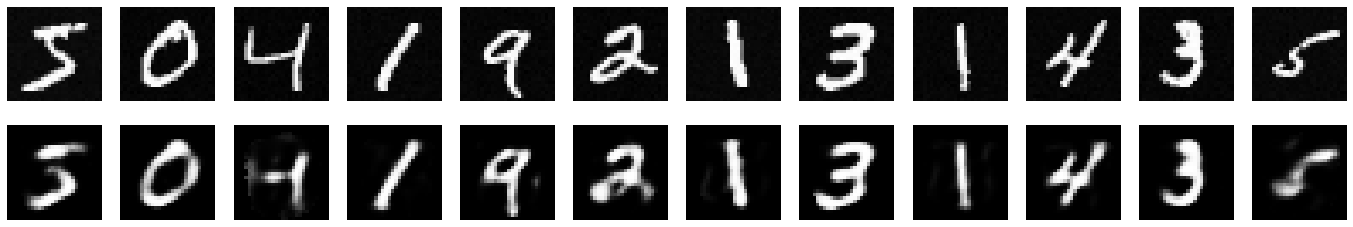

In [8]:
encoded_imgs = enc.predict(x_test)
decoded_imgs = dec.predict(encoded_imgs)
n = 12
plt.figure(figsize=(24, 4))
for i in range(n):
    # originals
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')

plt.show()

# Mathematics of Variational Encoders
<div>
    <img src="img/VAE.png" width=80%>
    <p><sub> The image doesn't represent the notation for the explanation</sub></p>
</div>

The Variational Encoders follow a slightly different approach. Instead of mapping an input to a fixed latent vector it instead maps the input to a latent distribution denoted as $p_\theta$. From the latent distribution $p_\theta$ a latent vector $z$ is sampled so that $z \sim p_\theta(z|x)$. The decoder then generates a value $x^{(i)}$ from the conditional distribution $p_\theta(x|z=z^{(i)})$ as output. $\theta$ denotes the parameters of the distribution.
So the optimal paramerts $\theta^*$ are the ones maximizing the probability of generating real data $x$ at the output.
$$\theta^{*} = \arg\max_\theta \prod_{i=1}^n p_\theta(\mathbf{x}^{(i)})$$ or most commonly used with log likelihood $$\theta^{*} = \arg\max_\theta \sum_{i=1}^n \log p_\theta(\mathbf{x}^{(i)})$$

The propability density function for the Gaussian distribution is 
$$p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }$$
where $\mu$ denotes the mean value and $\sigma$ denotes the standard deviation with $\sigma^2$ being the variance.

Training a VAE model we want to optimize a little differently to regular autoencoders. Firstly we still want to minimize the difference between our input $x$ and the output $ x^{'} $ but in addition we want to optimize the encoder model in a way, that the latent propability distribution $q_\phi(\mathbf{z}\vert\mathbf{x})$ is close to the real distribution $p_\theta(\mathbf{z}\vert\mathbf{x})$ as possible. The distance between both distributions can be measured by the Kullbach-Leibler divergence:
$$D_\text{KL}( q_\phi(\mathbf{z}\vert\mathbf{x}) \| p_\theta(\mathbf{z}\vert\mathbf{x}) )=\int q_\phi(\mathbf{z} \vert \mathbf{x}) \log\frac{q_\phi(\mathbf{z} \vert \mathbf{x})}{p_\theta(\mathbf{z} \vert \mathbf{x})} d\mathbf{z}$$
This will result in the following loss function for out model
$$L_\text{VAE}(\theta, \phi) = -\log p_\theta(\mathbf{x}) + D_\text{KL}( q_\phi(\mathbf{z}\vert\mathbf{x}) \| p_\theta(\mathbf{z}\vert\mathbf{x})$$

A problem of this process is the stochastic nature of sampling thus we cannot backpropagate the gradient. Therefore a reparametrization trick is introduced. Our random variable $z$ is expressed as deterministic variable $\mathbf{z} = \mathcal{T}_\phi(\mathbf{x}, \boldsymbol{\epsilon})$ with $\epsilon$ being an independent random variable.

The most common choice for $q_\phi(\mathbf{z}\vert\mathbf{x})$ is 
$$\begin{aligned}
\mathbf{z} &\sim q_\phi(\mathbf{z}\vert\mathbf{x}^{(i)}) = \mathcal{N}(\mathbf{z}; \boldsymbol{\mu}^{(i)}, \boldsymbol{\sigma}^{2(i)}\boldsymbol{I}) & \\
\mathbf{z} &= \boldsymbol{\mu} + \boldsymbol{\sigma} \odot \boldsymbol{\epsilon} \text{, where } \boldsymbol{\epsilon} \sim \mathcal{N}(0, \boldsymbol{I}) & \scriptstyle{\text{; Reparameterization trick.}}
\end{aligned}$$
So the loss becomes $${\cal L}\left( {x,\hat x} \right) + \beta \sum\limits_j {KL\left( {{q_j}\left( {z|x} \right)||N\left( {0,1} \right)} \right)}$$
<div>
    <img src="img/vae-gaussian-2.png" width=80%>
</div>

# Variational Autoencoder in Keras

In [16]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data() # greyscale images
# normalization and flattening <- preprocessing
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
x_train = x_train.reshape((len(x_train),x_train.shape[1]*x_train.shape[2]))
x_test = x_train.reshape((len(x_train),x_test.shape[1]*x_test.shape[2]))

# base parameters
dim = (28,28)
flat_dim = dim[0]*dim[1]
latent_space = 2

# defining encoder layers
inputs = keras.Input(shape=(flat_dim,))
h1 = keras.layers.Dense(128,activation="relu")(inputs)
z_mean = keras.layers.Dense(latent_space)(h1)
z_variance = keras.layers.Dense(latent_space)(h1)

# define sampling function using normal distribution for custom layer
def sampling(args): #where mean and variance are tensors
    mean, z_variance = args
    epsilon = keras.backend.random_normal(shape=(keras.backend.shape(z_mean)[1], 2),mean=0., stddev=0.1)
    return mean + tf.math.sqrt(z_variance) * epsilon

z = keras.layers.Lambda(sampling)([z_mean,z_variance]) # sampling layer

# Encoder model
encoder = keras.Model(inputs,[z_mean,z_variance,z],name="encoder")

# defining decoder layers
z_inputs = keras.Input(shape=(latent_space,))
h2 = keras.layers.Dense(128,activation="relu")(z_inputs)
outputs = keras.layers.Dense(flat_dim,activation="sigmoid")(h2)

# Decoder model
decoder = keras.Model(z_inputs,outputs,name="decoder")
# vae model
vae_outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs,vae_outputs,name="VAE")

In [13]:
encoder(inputs)[2].shape

TensorShape([None, 2])

In [17]:
vae.summary()

Model: "VAE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
encoder (Model)              [(None, 2), (None, 2), (N 100996    
_________________________________________________________________
decoder (Model)              (None, 784)               101520    
Total params: 202,516
Trainable params: 202,516
Non-trainable params: 0
_________________________________________________________________


# Not functioning yet

In [21]:
# Compute VAE loss
def my_vae_loss(y_true, y_pred,flat_dim=(28*28)):
    reconstruction_loss =  flat_dim * keras.metrics.CategoricalCrossentropy(y_true,y_pred)
    kl_loss = - 0.5 * tf.keras.backend.sum(1 + tf.math.log(z_variance) - tf.math.square(z_mean) - z_variance, axis=-1)
    vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)
    return vae_loss


vae.compile(optimizer="adam",loss = my_vae_loss)

In [2]:
#vae.fit(x_train, x_train, epochs=100, batch_size=32,validation_data=(x_test, x_test))

In [1]:
"""x_test_encoded = encoder.predict(x_test, batch_size=32)
plt.figure(figsize=(5, 5))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()"""

'x_test_encoded = encoder.predict(x_test, batch_size=32)\nplt.figure(figsize=(5, 5))\nplt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)\nplt.colorbar()\nplt.show()'

# CNN implementation using Keras

Cifar10 is a dataset containing 50000 images in size 32 x 32 x 3 (RGB). The images are classified into 10 different classes. The class distribution in the dataset is 1/10 for all 10 classes (6000 images per class).

In [7]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [8]:
x_train = x_train.astype("float32")/255 #normalizing pixel values
x_test = x_test.astype("float32")/255
y_train = keras.utils.to_categorical(y_train,10) # one hot encoding labels
y_test = keras.utils.to_categorical(y_test,10)

In [9]:
CNN = keras.Sequential()
CNN.add(keras.layers.Input(shape=(32,32,3)))
CNN.add(keras.layers.Conv2D(filters=32,kernel_size=(5,5),strides=(2,2),activation="relu",kernel_regularizer='l2'))
CNN.add(keras.layers.MaxPooling2D())
CNN.add(keras.layers.Conv2D(filters=64,kernel_size=(5,5),activation="relu",kernel_regularizer='l2'))
CNN.add(keras.layers.MaxPooling2D())
CNN.add(keras.layers.Flatten())
CNN.add(keras.layers.Dense(256,activation="relu"))
CNN.add(keras.layers.Dense(64,activation="relu"))
CNN.add(keras.layers.Dense(10,activation="sigmoid"))
CNN.compile(optimizer="adam",loss="categorical_crossentropy")
CNN.fit(x = x_train,y = y_train,batch_size=64,epochs=10,shuffle=True,validation_data=(x_test,y_test))
CNN.save(filepath="/models/CNN.h5",overwrite=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 15s 306us/sample - loss: 2.2568 - val_loss: 2.0554
Epoch 2/100
50000/50000 [==============================] - 14s 283us/sample - loss: 2.0322 - val_loss: 2.0362
Epoch 3/100
50000/50000 [==============================] - 14s 277us/sample - loss: 1.9725 - val_loss: 1.9055
Epoch 4/100
50000/50000 [==============================] - 14s 276us/sample - loss: 1.8541 - val_loss: 1.8360
Epoch 5/100
50000/50000 [==============================] - 14s 271us/sample - loss: 1.8095 - val_loss: 1.8063
Epoch 6/100
50000/50000 [==============================] - 14s 275us/sample - loss: 1.7880 - val_loss: 1.7641
Epoch 7/100
50000/50000 [==============================] - 14s 277us/sample - loss: 1.7685 - val_loss: 1.8137
Epoch 8/100
50000/50000 [==============================] - 14s 273us/sample - loss: 1.7546 - val_loss: 1.7745
Epoch 9/100
50000/50000 [==============================] - 14s 275us/s

In [16]:
CNN = keras.models.load_model("/models/CNN.h5")
scores = CNN.evaluate(x_test, y_test, verbose=1)
prediction = CNN.predict(x_test)

10000/10000 [==============================] - 1s 120us/sample - loss: 1.4861


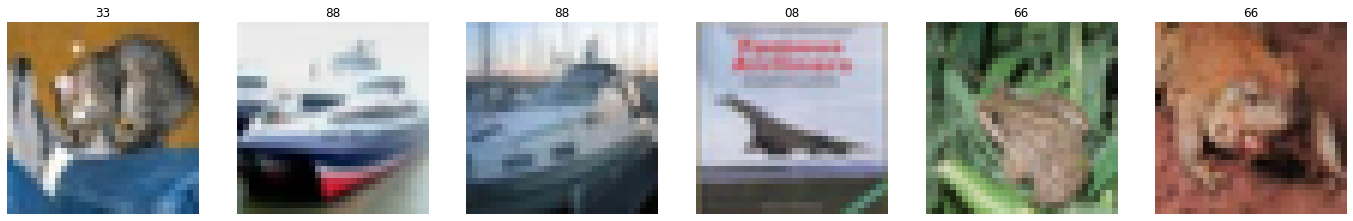

In [17]:
n = 6
plt.figure(figsize=(24, 4))
for i in range(n):
    # originals
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    plt.axis('off')
    ax.set_title(str(np.argmax(y_test[i],axis=0))+str(np.argmax(prediction[i],axis=0)))
    
plt.show()